# <center> **Mini Project 1** </centre>

### 1). Calculate the precession of the perihelion of Mercury, following the approach described in this section.

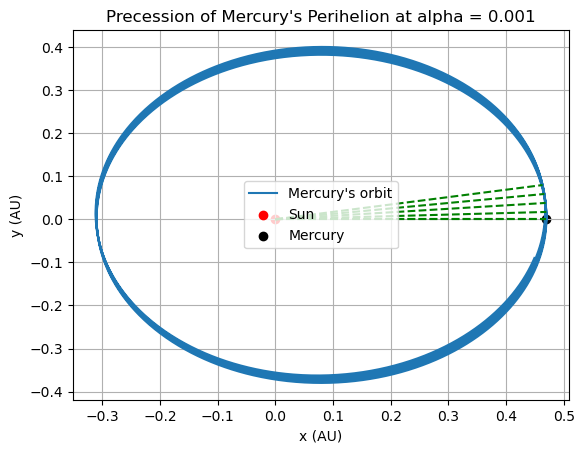

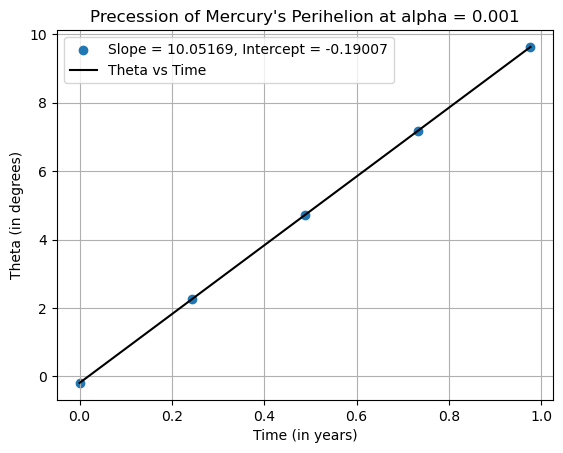

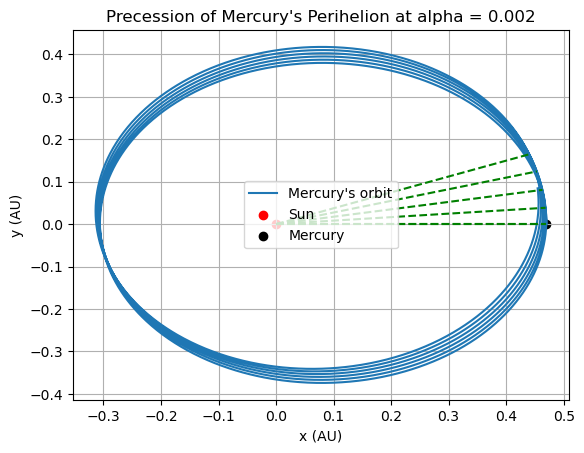

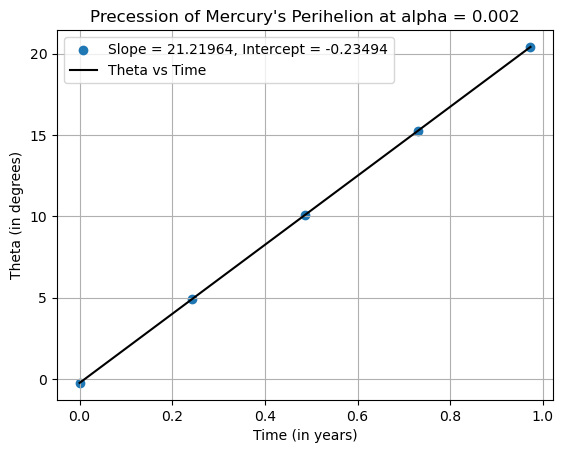

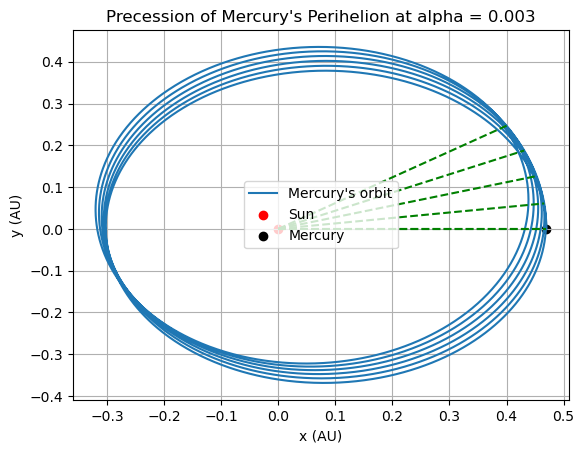

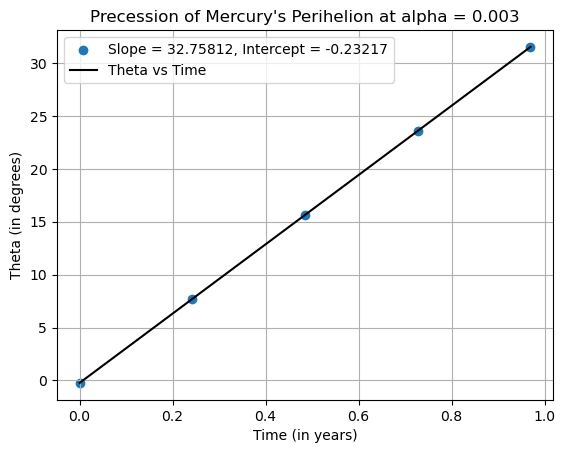

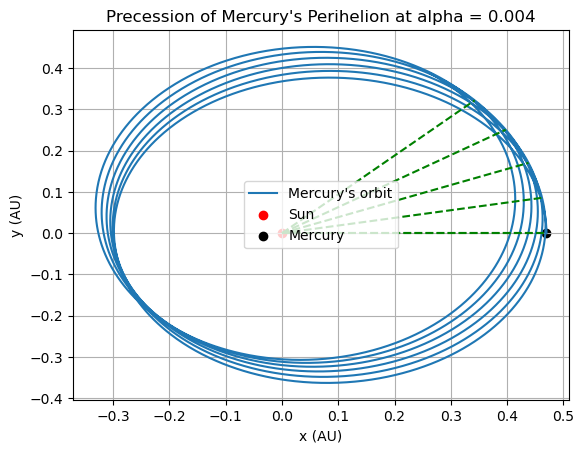

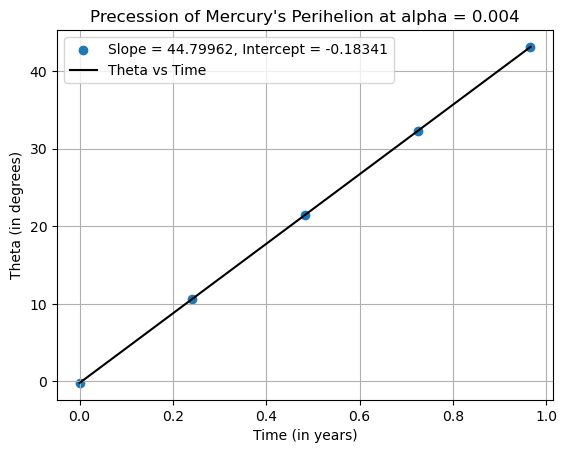

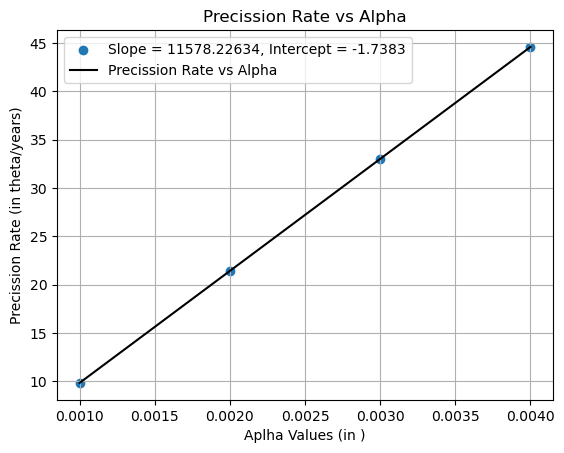

The precession angle for Mercury is approximately: 45.84977632506992 arcseconds per century


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions - these should be filled with actual values
x0 = 0.47 #AU (astronomical unit)
y0 = 0
vx0 = 0
vy0 = 8.2 #AU/year
tau = 0.24 # Time period of Mercury

# Assumptions
numberOfPartsOfMerucrysSingleOrbit = 1000
totalMercurysOrbitsObserved = 6

# Calculate time step size
dt = tau / numberOfPartsOfMerucrysSingleOrbit
total_t = numberOfPartsOfMerucrysSingleOrbit * totalMercurysOrbitsObserved

# Constants
alpha_values = np.array([0.001, 0.002, 0.003, 0.004])
slope_values = np.array([])
GM = 4 * np.pi ** 2  # Consistent with AU units
# Because of the limitation of computation, therefore values are directly substituted, instead of calcuating GMsMm programatically.


# Arrays to hold position and velocity data at each time step
x = np.zeros(total_t)
y = np.zeros(total_t)
vx = np.zeros(total_t)
vy = np.zeros(total_t)

# Set initial conditions
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0

# Using the Euler Method to integrate the equations of motion numerically

for alpha in alpha_values:
    for i in range(1, total_t):
        r_squared = x[i - 1] ** 2 + y[i - 1] ** 2
        #calculate the force factor on Mercury due to the Sun
        F = GM / r_squared * (1 + alpha / r_squared)

        # Calculate force factors in x and y directions
        fx_factor = -F * x[i-1]/ np.sqrt(r_squared)
        fy_factor = -F * y[i-1]/ np.sqrt(r_squared)

        # Update velocities using Newton's second law
        vx[i] = vx[i - 1] + fx_factor * dt
        vy[i] = vy[i - 1] + fy_factor * dt

        # Update positions using the updated velocities
        x[i] = x[i - 1] + vx[i] * dt
        y[i] = y[i - 1] + vy[i] * dt

    # Plot the trajectory of Mercury's orbit
    plt.plot(x, y, label="Mercury's orbit")
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")

    # Plot the Sun's location 
    plt.scatter(0, 0, color='red', marker='o', label='Sun')
    # Plot Mercury's initial location 
    plt.scatter(x0, 0, color='black', marker='o', label='Mercury')
    
    # Plot Mercury's locations after each complete cycle (orbit)
    xApogee = np.zeros(totalMercurysOrbitsObserved)
    yApogee = np.zeros(totalMercurysOrbitsObserved)
    tApogee = np.zeros(totalMercurysOrbitsObserved)


     # Plot dashed lines representing the apogee (farthest point)of Mercury's orbit
    plt.plot([0,x0], [0,y0], linestyle='dashed', color='green')
    for i in range(totalMercurysOrbitsObserved):

        # Calculating distance using sqrt(x**2 + y**2)
        k = numberOfPartsOfMerucrysSingleOrbit * i
        arrayIndexStart = k
        arrayIndexEnd = k + numberOfPartsOfMerucrysSingleOrbit

        radiusAtEveryDT = np.sqrt(x[arrayIndexStart:arrayIndexEnd]**2 + y[arrayIndexStart:arrayIndexEnd]**2)
        maxIndexInArray = np.argmax(radiusAtEveryDT)
        xApogee[i] = x[k + maxIndexInArray]
        yApogee[i] = y[k + maxIndexInArray]
        tApogee[i] = (k + maxIndexInArray) * dt
     
        if i < totalMercurysOrbitsObserved - 1:
            plt.plot([0,xApogee[i]], [0,yApogee[i]], linestyle='dashed', color='green')

    yApogee = yApogee[:-1]
    xApogee = xApogee[:-1]
    tApogee = tApogee[:-1]
    plt.title("Precession of Mercury's Perihelion at alpha = {}".format(alpha))
    plt.grid(True)
    plt.legend()
    plt.show()


    #theta = np.arctan2(xApogee, yApogee) * 180 / np.pi
    theta = np.arctan2(yApogee, xApogee) # Calculate arctan using np.arctan2
    theta_deg = np.degrees(theta) # Convert radians to degrees
    theta_deg = np.where(theta_deg < 0, theta_deg + 360, theta_deg) # Ensure angles are between 0 and 360 degrees

    # Linear fit the curve and calculate the slope
    slope, intercept = np.polyfit(tApogee, theta_deg, 1)
    slope_values = np.append(slope_values, slope)
    theta_fit = slope * tApogee + intercept
    slope, intercept = np.polyfit(tApogee, theta_fit, 1)
    plt.scatter(tApogee, theta_fit,
                label="Slope = {}, Intercept = {}".format(round(slope,5), round(intercept,5)))
    plt.plot(tApogee, theta_fit, color='black', label="Theta vs Time")
    plt.xlabel("Time (in years)")
    plt.ylabel("Theta (in degrees)")
    plt.title("Precession of Mercury's Perihelion at alpha = {}".format(alpha))
    plt.grid(True)
    plt.legend()
    plt.show()


# Linear fit the curve, and calculate slope
final_slope, final_intercept = np.polyfit(alpha_values, slope_values, 1)
slope_values_fit = final_slope * alpha_values + final_intercept
final_slope, final_intercept = np.polyfit(alpha_values, slope_values_fit, 1)

plt.scatter(alpha_values, slope_values_fit,
         label="Slope = {}, Intercept = {}".format(round(final_slope,5), round(final_intercept,5)))
plt.plot(alpha_values, slope_values_fit, color='black', label="Precission Rate vs Alpha")
plt.xlabel("Aplha Values (in )")
plt.ylabel("Precission Rate (in theta/years)")
plt.title("Precission Rate vs Alpha")
plt.grid(True)
plt.legend()
plt.show()

final_slope, final_intercept = np.polyfit(alpha_values, slope_values, 1)

actual_alpha = 1.1e-8 #AU^2
actual_precission_rate = final_slope * actual_alpha

print("The precession angle for Mercury is approximately:",actual_precission_rate * 360000,"arcseconds per century")      # Print the actual precession rate in arcseconds per century




#### Now calculate the precessission angle of mercury using formula deduced from General Relativity

In [2]:
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^−1 s^−2)
M = 1.989e30     # Mass of the Sun (kg)
c = 299792458    # Speed of light (m/s)
a = 5.79e10      # Semi-major axis of Mercury's orbit (m)
eccentricity = 0.206
orbital_period_years = 0.2408467  #Approx 88 days 

# Calculate precession rate
precession_per_orbit = (6 * np.pi * G * M) / (c**2 * a * (1 - eccentricity**2))   # In Radian
precession_degree = np.degrees(precession_per_orbit)
precession_arcseconds_per_crntury = (precession_degree/orbital_period_years)*3600*100

print("The precession angle for Mercury is approximately:", precession_arcseconds_per_crntury, "arcseconds per century")


The precession angle for Mercury is approximately: 43.00691425825001 arcseconds per century


There is slight differences in the actual values due to the limitations of numerical methods and the precision of the calculations. Secondly we use here euler method which is only of first order. That may be reason for this deviation.

### 2). Investigate how the precession of the perihelion of a planet's orbit due to general relativity varies as a function of the eccentricity of the orbit. Study the precession of different elliptical orbits with different eccentricities, but with the same value of the perihelion. Let the perihelion have the same value as for Mercury, so that you can compare it with the results shown in this section.

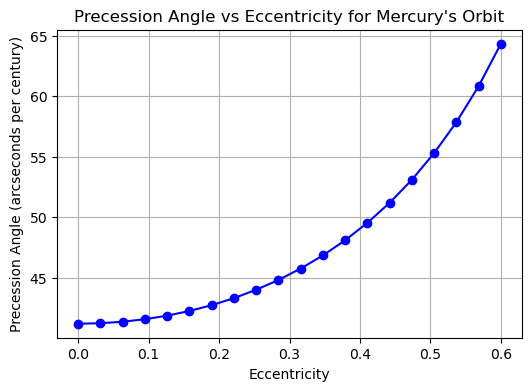

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^−1 s^−2)
M = 1.989e30     # Mass of the Sun (kg)
c = 299792458    # Speed of light (m/s)
a = 5.79e10      # Semi-major axis of Mercury's orbit (m)
orbital_period_years = 0.2408467  # Approx 88 days 

# Vary eccentricity values
eccentricities = np.linspace(0, 0.6, 20)

# Calculate precession rate for each eccentricity
precession_angles = []
for e in eccentricities:
    precession_per_orbit = (6 * np.pi * G * M) / (c**2 * a * (1 - e**2))  # In radians
    precession_degree = np.degrees(precession_per_orbit)
    precession_arcseconds_per_crntury = (precession_degree / orbital_period_years) * 3600 * 100
    precession_angles.append(precession_arcseconds_per_crntury)

# Plot the results
plt.figure(figsize=(6,4))
plt.plot(eccentricities, precession_angles, marker='o', linestyle='-', color='b')
plt.xlabel("Eccentricity")
plt.ylabel("Precession Angle (arcseconds per century)")
plt.title("Precession Angle vs Eccentricity for Mercury's Orbit")
plt.grid(True)
plt.show()


Conclusion:- It shows a positive correlation between the eccentricity of Mercury’s orbit and its precession angle (measured in arcseconds per century). As the eccentricity increases, the precession angle also increases.